Now we'll work with IMDB dataset

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 4s 0us/step


Let's have a look at the data. Basically, each number is an index for a word in a dictionary of common words. The last parameter in the previous call means we're only taking the 10k most common words.

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

The labels below. They're in binary, so this saves us any processing here. This is a binary classification problem.

In [4]:
train_labels[0]

1

Only the 10k most common words in the dict:

In [5]:
max([max(sequence) for sequence in train_data])

9999

Since we've limited it to 10k words, each review can just be a 10k vector of 1-hot encoded words. So we'll define our function:

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # all zero matrix of that shape
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # set the positions to 1 that need to be set
        results[i, sequence] = 1. #put the decimal point to make sure this is a float
    return results

Let's fix up our data:

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# this was already one-hot encoded into 0-1 (binary), so not much work
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Let's build our network: We'll use 2 hidden layers, densely connected with relu activation functions and a sigmoid output which will map to a [0-1] probability that the input belongs to class=1

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # probability of a positive review

Binary cross-entropy cost functions work best for probability outputs. 

In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

We'll take the first 10k rows as a validation set

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Now let's train the model and validate

In [17]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 204us/step - loss: 0.1381 - acc: 0.9570 - val_loss: 0.3015 - val_acc: 0.8845
Epoch 2/20
15000/15000 [==============================] - 3s 206us/step - loss: 0.1162 - acc: 0.9623 - val_loss: 0.2970 - val_acc: 0.8866
Epoch 3/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.0921 - acc: 0.9735 - val_loss: 0.3338 - val_acc: 0.8782
Epoch 4/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.0765 - acc: 0.9769 - val_loss: 0.3962 - val_acc: 0.8683
Epoch 5/20
15000/15000 [==============================] - 3s 207us/step - loss: 0.0650 - acc: 0.9815 - val_loss: 0.3698 - val_acc: 0.8772
Epoch 6/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.0524 - acc: 0.9859 - val_loss: 0.3875 - val_acc: 0.8795
Epoch 7/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.0438 - acc: 0.9894 - val_loss: 0.4133 - 

Let's analyze the fit

In [19]:
history_dict = history.history
history_dict.keys() # we should have keys for the validation set

['acc', 'loss', 'val_acc', 'val_loss']

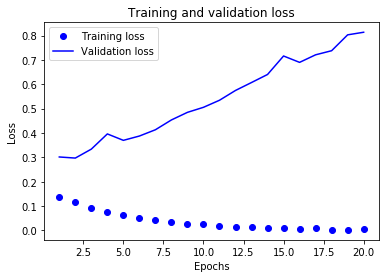

In [21]:
%matplotlib inline
history_dict = history.history

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

High loss on validation, low on training. This suggests overfitting.

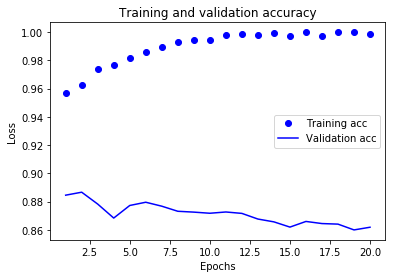

In [22]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Low accuracy on validation and high on training. Again, indicative of overfitting. One thing we can do is to reduce the epochs from 20 to a point where the kpi's are at an optimal level. In this case, it would be 4. Let's retrain our network and have a second look.

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # probability of a positive review

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 249us/step - loss: 0.5195 - acc: 0.7873 - val_loss: 0.4034 - val_acc: 0.8594
Epoch 2/4
15000/15000 [==============================] - 4s 236us/step - loss: 0.3132 - acc: 0.8997 - val_loss: 0.3065 - val_acc: 0.8912
Epoch 3/4
15000/15000 [==============================] - 4s 236us/step - loss: 0.2289 - acc: 0.9252 - val_loss: 0.2890 - val_acc: 0.8836
Epoch 4/4
15000/15000 [==============================] - 4s 243us/step - loss: 0.1813 - acc: 0.9397 - val_loss: 0.2774 - val_acc: 0.8889


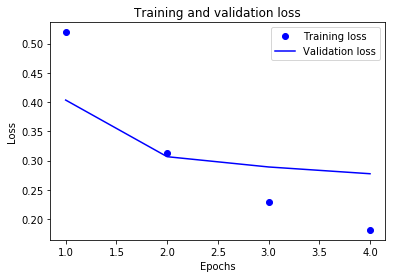

In [27]:
history_dict = history.history

plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

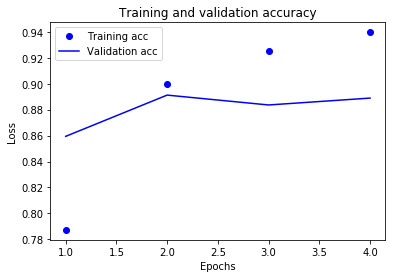

In [29]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Accuracy plateaus at around 88%. Could be higher with other techniques

I realized I had re-trained the same model and got up to 80% loss due to extreme overfitting. Re-creating the network and re-training gave me a better performance. Let's try a prediction on our test set.

In [28]:
print(model.predict(x_test))

[[0.1864962 ]
 [0.9992581 ]
 [0.8738323 ]
 ...
 [0.08311433]
 [0.12867019]
 [0.49674216]]
